## Fuel cost Reference
- [포럼](http://www.dslreports.com/forum/r22146146-Average-MPG-of-moving-truck)
- [렌탈 업체 1](https://www.pensketruckrental.com/moving-trucks/)
- [렌탈 업체 1](http://www.upack.com/moving-tools/fuel.asp)

> 평균적으로 **10 miles per gallon**

> handout에 따라 **$3.78 per gallon**

> 그러므로 **$0.378 per mile**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [30]:
stores = pd.read_csv('Store_list.csv')
stores.head()
stores.shape

(1752, 23)

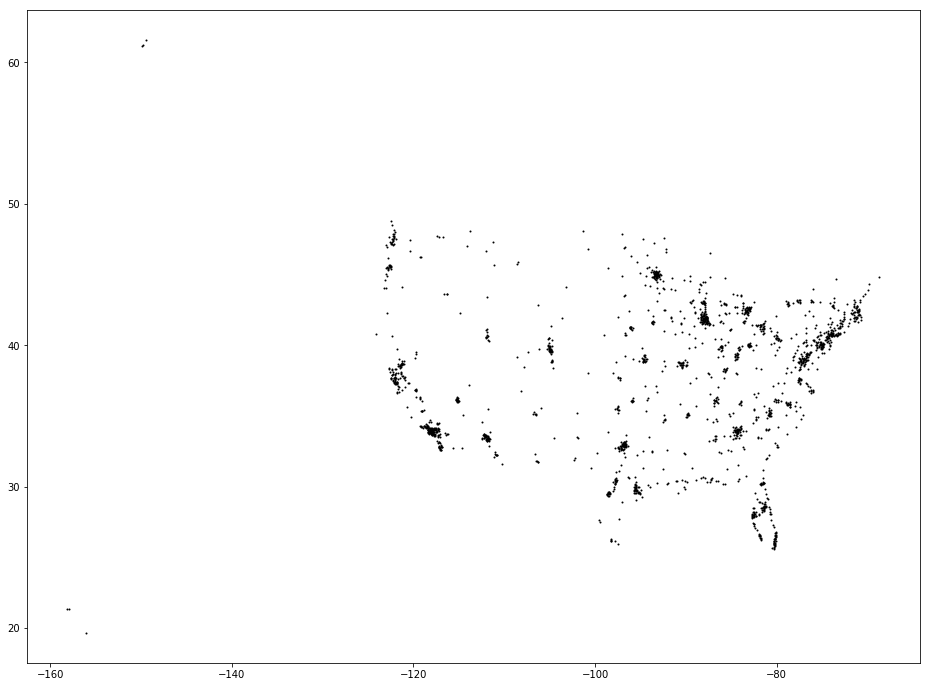

In [31]:
plt.scatter(stores.X, stores.Y, c='black', s=1)
plt.show();

In [32]:
stores[stores.X < -140]

,ID,STORE,NAME,X,Y,CLASS,CLIMATE,FOOD,DC,MILES,...,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,TTL
1570,1571,2339,WASILLA,-149.40500,61.57740,B,1,Y,558,1817,...,27942,26790,36621,30947,32913,35867,29111,36098,47024,395571
1601,1602,2371,ANKORAGE NE,-149.74814,61.22576,AA,1,Y,558,1814,...,43393,41603,56871,48060,51113,55700,45209,56060,73027,614307
1602,1603,2372,ANKORAGE S,-149.88339,61.12852,A,1,Y,558,1814,...,39440,37813,51689,43682,46456,50625,41090,50952,66373,558338
1634,1635,2410,OAHU-HONOLULU WEST,-157.92922,21.35557,AAA,6,Y,3806,3160,...,75149,72048,98488,83231,88518,96462,78293,97084,126468,1063856
1635,1636,2411,OAHU-KAPOLEI,-158.09514,21.33214,A,6,Y,3806,3170,...,58740,56317,76983,65057,69190,75399,61197,75885,98853,831562
1636,1637,2412,KONA,-156.00064,19.64779,A+,6,Y,3806,3141,...,51312,49195,67249,56831,60441,65865,53459,66290,86353,726409


In [33]:
stores_USA = stores[~(stores.X < -140)]
stores_USA.shape

(1746, 23)

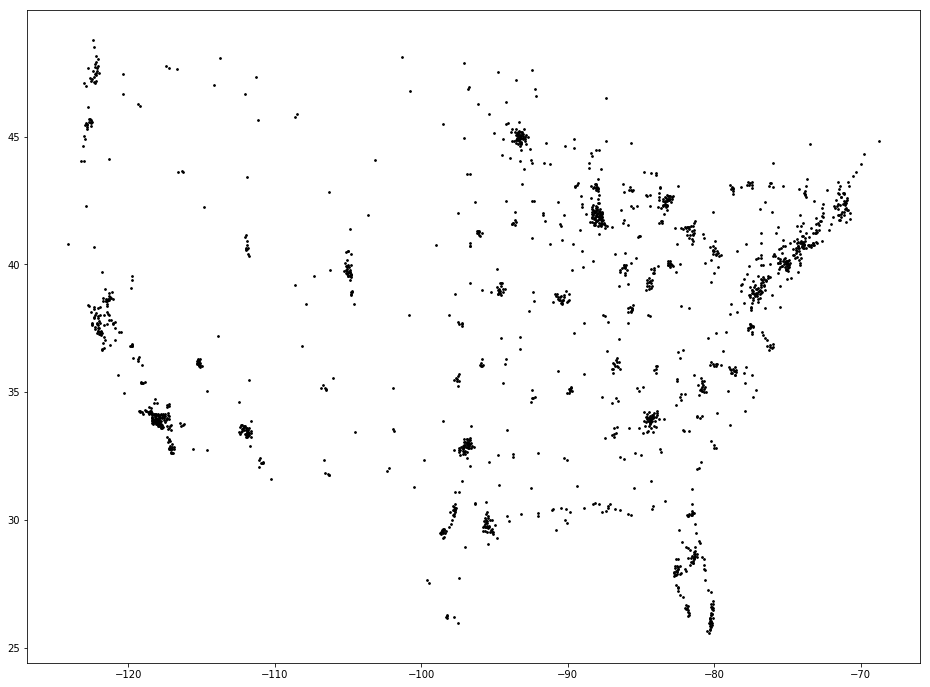

In [34]:
plt.figure(figsize=(16,12))
plt.scatter(stores_USA.X, stores_USA.Y, c='black', s=3)
plt.show();

In [35]:
region_1 = stores[stores.DC == 558].MILES.mean()
region_2 = stores_USA[stores_USA.DC == 558].MILES.mean()
print("알래스카를 포함한 558 RDC\n평균 MILES %.2f Cost %.2f" % (region_1, region_1 * 0.378))
print("\n알래스카를 제외한 558 RDC\n평균 MILES %.2f Cost %.2f" % (region_2, region_2 * 0.378))

알래스카를 포함한 558 RDC
평균 MILES 321.93 Cost 121.69

알래스카를 제외한 558 RDC
평균 MILES 253.02 Cost 95.64


In [36]:
region_1 = stores[stores.DC == 3806].MILES.mean()
region_2 = stores_USA[stores_USA.DC == 3806].MILES.mean()
print("하와이를 포함한 3806 RDC\n평균 MILES %.2f Cost %.2f" % (region_1, region_1 * 0.378))
print("\n하와이를 제외한 3806 RDC\n평균 MILES %.2f Cost %.2f" % (region_2, region_2 * 0.378))

하와이를 포함한 3806 RDC
평균 MILES 229.32 Cost 86.68

하와이를 제외한 3806 RDC
평균 MILES 66.67 Cost 25.20


In [37]:
stores.ix[0][10:-1].values

array([33468, 33309, 43604, 34596, 33169, 45342, 38317, 40751, 44408,
       36044, 44695, 58222], dtype=object)

for i in range(100):
    data = stores.ix[i, 10:-1]
    plt.plot(range(1, 13), data.values, alpha=0.3)
plt.show();

표준값 z는 원수치인 x가 평균에서 얼마나 떨어져 있는지를 나타낸다. 음수이면 평균이하, 양수이면 평균이상이다.$ \frac{x - \mu}{\sigma} $
여기서 x는 정상화되는 원수치이다.
σ는 모집단에서의 표준편차이다.
μ는 모집단에서의 평균이다.

In [38]:
store_cnt = stores.ix[0, 10:-1]
(store_cnt - store_cnt.mean()) / store_cnt.std()

JAN     -0.95571
FEB    -0.977339
MAR     0.423086
APR    -0.802269
MAY    -0.996383
JUN     0.659506
JUL    -0.296103
AUG    0.0349936
SEP     0.532454
OCT    -0.605298
NOV     0.571495
DEC      2.41157
Name: 0, dtype: object

for i in range(stores.shape[0]):
    data = stores.ix[i, 10:-1]
    z = (data - data.mean()) / data.std()
    plt.plot(range(1, 13), z.values, alpha=0.1)
plt.show();

rdc_in = pd.read_csv('RDC_inbound.csv')
rdc_in.head()

rdc_out = pd.read_csv('RDC_outbound.csv')
rdc_out.head()

for i in range(rdc_in.shape[0]):
    data = rdc_in.ix[i, 1:-1]
    z = (data - data.mean()) / data.std()
    plt.plot(range(1, 13), z.values, alpha=0.1)
plt.show();

### RDC에 따라 색칠

In [39]:
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [40]:
Series(colors).head()

aliceblue       #F0F8FF
antiquewhite    #FAEBD7
aqua            #00FFFF
aquamarine      #7FFFD4
azure           #F0FFFF
dtype: object

In [41]:
# stores_USA = stores_USA.reindex(index=range(0, stores_USA.shape[0]))
# stores_USA.tail()

In [42]:
stores.shape
stores_USA.shape

(1746, 23)

In [43]:
color_map = {}
for i in range(stores.shape[0]):
    rdc = stores.ix[i, 8]
    if rdc not in color_map:
        color_map[rdc] = (np.random.rand(), np.random.rand(), np.random.rand())
color_map = Series(color_map)
color_map.size
color_map.head()

551    (0.46353226702358175, 0.14507757589867554, 0.3...
553    (0.08173501511610604, 0.9526452335771499, 0.84...
554    (0.9636481606920739, 0.3193725757674536, 0.961...
555    (0.32721894888378333, 0.1071009510859211, 0.81...
556    (0.5919489577312465, 0.3463365448785799, 0.011...
dtype: object

In [44]:
color_map

551     (0.46353226702358175, 0.14507757589867554, 0.3...
553     (0.08173501511610604, 0.9526452335771499, 0.84...
554     (0.9636481606920739, 0.3193725757674536, 0.961...
555     (0.32721894888378333, 0.1071009510859211, 0.81...
556     (0.5919489577312465, 0.3463365448785799, 0.011...
557     (0.055006503645192883, 0.5851544237266683, 0.4...
558     (0.8952302486796962, 0.40285822454502485, 0.78...
559     (0.7949281541504322, 0.567431382044904, 0.8000...
560     (0.5353047245173355, 0.7667486868031963, 0.558...
578     (0.653733127059093, 0.5261719076642599, 0.3772...
579     (0.8004496952675311, 0.34650372105326455, 0.80...
580     (0.30497622857163376, 0.06161831792261119, 0.0...
587     (0.9506542244200347, 0.13964692524301303, 0.89...
588     (0.9591496641444189, 0.5803592415285642, 0.786...
589     (0.15318812403998483, 0.9501974694980833, 0.76...
590     (0.4121007984612207, 0.7790187470983599, 0.203...
593     (0.5032326571351782, 0.911464899523146, 0.4113...
594     (0.318

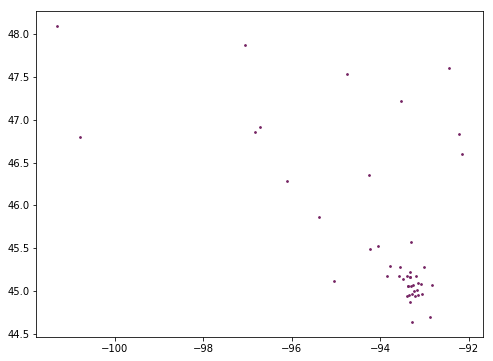

In [45]:
plt.figure(figsize=(8,6))
store = stores[stores['DC'] == 551]
plt.scatter(store.X, store.Y, s=3, c=color_map[551])
plt.show();

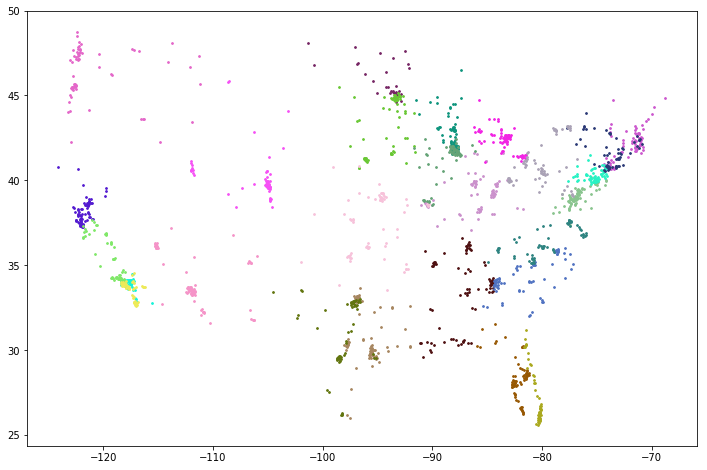

In [46]:
plt.figure(figsize=(12,8))
temp = stores[~(stores.X < -140)]
for i in color_map.keys():
    store = temp[temp['DC'] == i]
    plt.scatter(store.X, store.Y, s=3, c=color_map[i])
plt.show();

In [47]:
size = temp['TTL']
size = size / size.min()

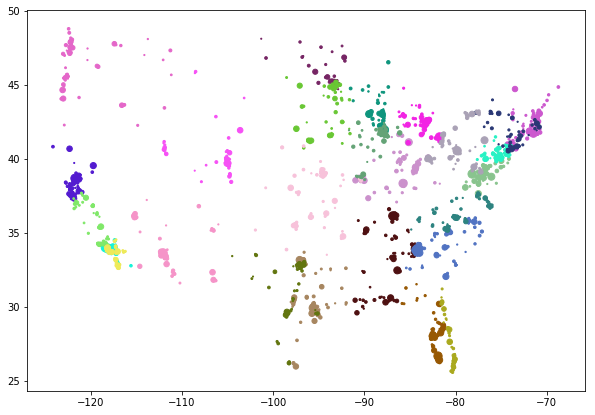

In [48]:
plt.figure(figsize=(10,7))
temp = stores[~(stores.X < -140)]
for i in color_map.keys():
    store = temp[temp['DC'] == i]
    plt.scatter(store.X, store.Y, s=size**2, c=color_map[i])
plt.show();

### RDC Dict 만들기

In [49]:
rdc_store = {}
for i in range(stores.shape[0]):
    rdc = stores.ix[i, 8]
    if rdc not in rdc_store:
        rdc_store[rdc] = [i]
    else:
        rdc_store[rdc].append(i)
len(rdc_store)

26

In [50]:
rdc_store = Series(rdc_store)
rdc_store.head()

551    [0, 1, 13, 16, 19, 29, 74, 90, 104, 210, 239, ...
553    [63, 64, 68, 73, 79, 82, 83, 85, 86, 93, 94, 1...
554    [5, 9, 12, 17, 24, 33, 46, 49, 52, 54, 81, 100...
555    [108, 139, 140, 141, 142, 145, 146, 148, 149, ...
556    [232, 233, 234, 235, 236, 237, 238, 247, 266, ...
dtype: object

In [51]:
rdc_store[558].remove(1570)
rdc_store[558].remove(1601)
rdc_store[558].remove(1602)

In [52]:
rdc_store[3806].remove(1634)
rdc_store[3806].remove(1635)
rdc_store[3806].remove(1636)

In [27]:
1570, 1601, 1602
1634, 1635, 1636

(1570, 1601, 1602)

(1634, 1635, 1636)

In [53]:
rdc_store_mile = {}
for i in rdc_store.keys():
    rdc_store_mile[i] = stores.ix[rdc_store[i]].MILES.sum()
    print("{:>4} rdc: {:>6} miles".format(i, stores.ix[rdc_store[i]].MILES.sum()))

 551 rdc:   3860 miles
 553 rdc:   2949 miles
 554 rdc:  14125 miles
 555 rdc:   5692 miles
 556 rdc:  19486 miles
 557 rdc:   6841 miles
 558 rdc:  16446 miles
 559 rdc:  10937 miles
 560 rdc:  13173 miles
 578 rdc:  16751 miles
 579 rdc:  12594 miles
 580 rdc:  17071 miles
 587 rdc:  11187 miles
 588 rdc:  13284 miles
 589 rdc:   9124 miles
 590 rdc:  12289 miles
 593 rdc:   6904 miles
 594 rdc:  13063 miles
3801 rdc:  11138 miles
3802 rdc:   9448 miles
3803 rdc:  13735 miles
3804 rdc:  15803 miles
3806 rdc:   3600 miles
3808 rdc:  16876 miles
3809 rdc:   6362 miles
3811 rdc:  10272 miles


In [54]:
rdc_store_mile = Series(rdc_store_mile)
rdc_store_mile

551      3860
553      2949
554     14125
555      5692
556     19486
557      6841
558     16446
559     10937
560     13173
578     16751
579     12594
580     17071
587     11187
588     13284
589      9124
590     12289
593      6904
594     13063
3801    11138
3802     9448
3803    13735
3804    15803
3806     3600
3808    16876
3809     6362
3811    10272
dtype: int64

### RDC의 좌표 배정

[Address to coordinate](http://www.latlong.net/convert-address-to-lat-long.html)

In [55]:
rdc_gps = {
    551: [45.100414, -93.244236],
    553: [34.112729, -117.481203],
    554: [38.279830, -104.467477],
    555: [38.682112, -121.723487],
    556: [31.438055, -83.505176],
    557: [43.079434, -88.475345],
    558: [44.579298, -123.114755],
    559: [39.746883, -86.293951],
    560: [38.031176, -78.998563],
    578: [32.465938, -95.418334],
    579: [43.178108, -73.717838],
    580: [34.651991, -86.843754],
    587: [42.277805, -85.382499],
    588: [33.447430, -112.219167],
    589: [39.887910, -77.673994],
    590: [42.482684, -92.472762],
    593: [35.463311, -119.189116],
    594: [34.179305, -80.679016],
    600: [47.081522, -122.772856],
    3800: [36.707479, -76.663352],
    3801: [32.434564, -97.055514],
    3802: [42.938499, -74.238479],
    3803: [38.966794, -95.694757],
    3804: [39.950801, -83.34583],
    3806: [34.155455, -117.431043],
    3807: [34.154758, -117.418642],
    3808: [31.776179, -81.352717],
    3809: [41.915396, -88.737029],
    3810: [32.173827, -81.175503],
    3811: [35.624738, -81.31156],
    3892: [30.231119, -82.636865],
    3893: [33.447123, -112.191397],
    3894: [32.668438, -97.32258],
    3895: [42.476480, -92.471272],
    9407: [44.945170, -92.912137],
    9478: [32.088892, -110.798603],
    9479: [34.046245, -117.57188],
}
rdc_gps = Series(rdc_gps)
rdc_gps.head()

551     [45.100414, -93.244236]
553    [34.112729, -117.481203]
554     [38.27983, -104.467477]
555    [38.682112, -121.723487]
556     [31.438055, -83.505176]
dtype: object

In [56]:
x = []
y = []
for i in rdc_gps.values:
    y.append(i[0])
    x.append(i[1])
np.array([x, y]).T.shape

(37, 2)

In [57]:
rdc_gps_df = DataFrame(np.array([x, y]).T, index=rdc_gps.index, columns=['X', 'Y'])
rdc_gps_df.head()

,X,Y
551,-93.244236,45.100414
553,-117.481203,34.112729
554,-104.467477,38.279830
555,-121.723487,38.682112
556,-83.505176,31.438055


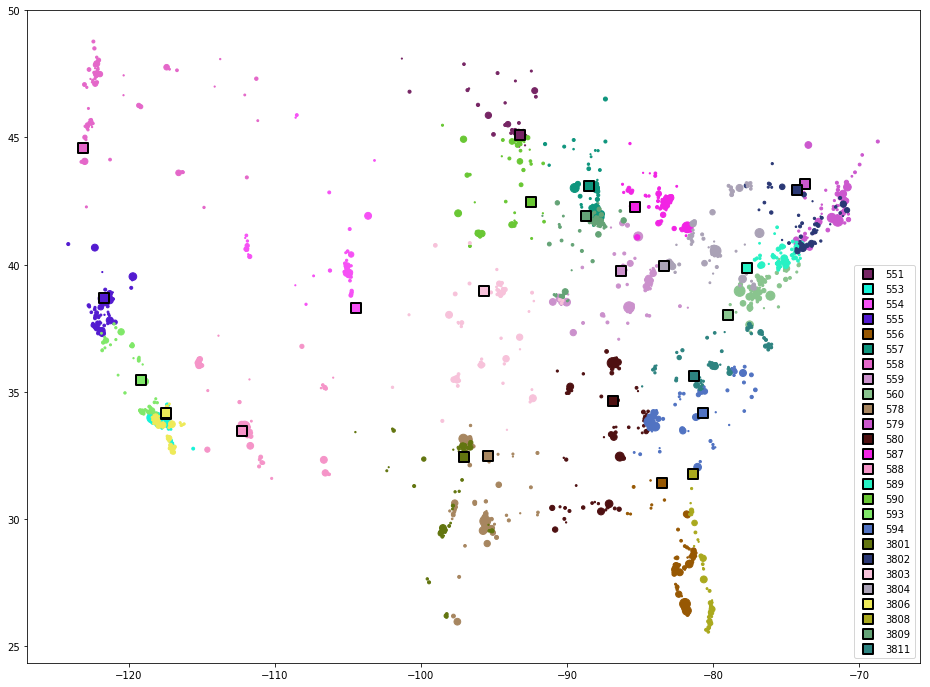

In [58]:
plt.figure(figsize=(16,12))
temp = stores[~(stores.X < -140)]
for i in color_map.keys():
    store = temp[temp['DC'] == i]
    plt.scatter(store.X, store.Y, s=size**2.25, c=color_map[i], label=None)
for i in color_map.keys():
    ax = plt.scatter(rdc_gps_df.ix[i].X, rdc_gps_df.ix[i].Y,
                     c=color_map[i],
                     linewidth='2',
                     edgecolor='black',
                     marker='s',
                     s=100)
    ax.set_label(i)

plt.legend()
plt.show();

### RDC하나 찝어서 살펴보기

In [66]:
rdc_551_store = stores.ix[rdc_store[551]]
rdc_551_store.head()

,ID,STORE,NAME,X,Y,CLASS,CLIMATE,FOOD,DC,MILES,...,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,TTL
0,1,3,CRYSTAL,-93.38,45.06,B,1,Y,551,15,...,34596,33169,45342,38317,40751,44408,36044,44695,58222,485926
1,2,4,DULUTH,-92.22,46.84,A+,1,Y,551,148,...,56503,54172,74052,62580,66556,72528,58867,72996,95089,799899
13,14,52,LAKE ST.,-93.22,44.94,B,1,Y,551,19,...,36822,35303,48258,40782,43373,47265,38363,47570,61968,523714
16,17,61,FARGO,-96.82,46.86,AA,1,Y,551,232,...,64352,61697,84338,71273,75800,82603,67044,83135,108298,911008
19,20,68,E ST. PAUL,-93.05,44.96,C,1,Y,551,23,...,26872,25764,35218,31251,33236,36218,29397,36452,47485,391916


In [67]:
print("rdc size:", rdc_551_store.shape)

rdc size: (46, 23)


In [90]:
print("%.4f, %.4f"%(rdc_gps[551][1], rdc_gps[551][0]))

-93.2442, 45.1004


In [89]:
print("%.4f, %.4f"%(rdc_551_store.ix[0].X, rdc_551_store.ix[0].Y))

-93.3800, 45.0600


In [72]:
def gps_to_mile(store_index):
    store = rdc_551_store.ix[store_index]
    a, b = rdc_gps[551][1], rdc_gps[551][0]
    x, y = store.X, store.Y
    return (abs(a - x)**2 + abs(b - y)** 2)**0.5, store.MILES

In [71]:
store_index = 0
store = rdc_551_store.ix[store_index]
a, b = rdc_gps[551][1], rdc_gps[551][0]
x, y = store.X, store.Y
print("gps좌표로 따진 거리:", (abs(a - x)**2 + abs(b - y)** 2)**0.5)
print("대응되는 MILES:", store.MILES)

gps좌표로 따진 거리: 0.141651526967
대응되는 MILES: 15


In [73]:
store_index = 1
store = rdc_551_store.ix[store_index]
a, b = rdc_gps[551][1], rdc_gps[551][0]
x, y = store.X, store.Y
print("gps좌표로 따진 거리:", (abs(a - x)**2 + abs(b - y)** 2)**0.5)
print("대응되는 MILES:", store.MILES)

gps좌표로 따진 거리: 2.01871712607
대응되는 MILES: 148


In [74]:
gps, miles = gps_to_mile(13)
print("gps좌표로 따진 거리:", gps)
print("대응되는 MILES:", miles)

gps좌표로 따진 거리: 0.162234506478
대응되는 MILES: 19


In [75]:
gps = []
mile = []
for i in rdc_551_store.index:
    a, b = gps_to_mile(i)
    gps.append(a)
    mile.append(b)

In [97]:
all_gps = []
all_mile = []
temp = stores[~(stores.X < -140)]
for i in range(temp.shape[0]):
    try:
        store = temp.ix[i]
        rdc = store[8]

        a, b = rdc_gps[rdc][1], rdc_gps[rdc][0]
        x, y = store.X, store.Y
        all_gps.append((abs(a - x)**2 + abs(b - y)** 2)**0.5)
        all_mile.append(store.MILES)
    except:
        pass
print(len(all_gps), len(all_mile))

1740 1740


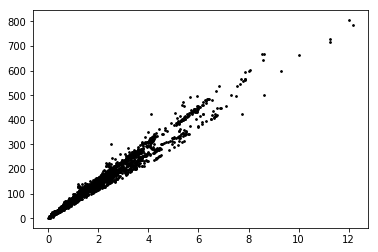

In [98]:
plt.scatter(all_gps, all_mile,
           c='black',
           s=3)
plt.show();

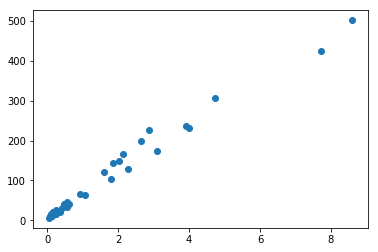

In [76]:
plt.scatter(gps, mile)
plt.show();

### gps coordinate와 mile간의 환산 식 구하기
$ mile = w*gps + b$

In [77]:
from sklearn.metrics import r2_score
_gps = np.array(gps)
_mile = np.array(mile)
_x = (_gps - _gps.mean())/_gps.std()
_y = (_mile - _mile.mean())/_mile.std()
r2_score(_x, _y)

0.98346032455720833

In [99]:
from sklearn import linear_model


X_train = np.array(gps[:36]).reshape(-1, 1)
X_train = np.array(all_gps).reshape(-1, 1)
X_test = np.array(gps[36:]).reshape(-1, 1)

y_train = np.array(mile[:36]).reshape(-1, 1)
y_train = np.array(all_mile).reshape(-1, 1)
y_test = np.array(mile[36:]).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((36, 1), (10, 1))

In [100]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [[ 68.73680887]]
Mean squared error: 1318.56
Variance score: 0.91


In [82]:
# The coefficients
print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [[ 59.81491991]]
Mean squared error: 258.02
Variance score: 0.98


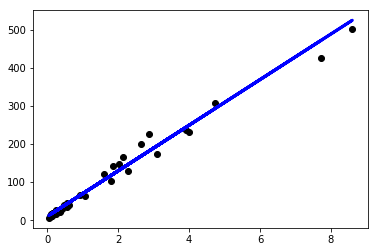

In [84]:
# Plot outputs
plt.scatter(gps, mile,  color='black')
plt.plot(_gps.reshape(-1, 1),
         regr.predict(_gps.reshape(-1, 1)),
         color='blue',
         linewidth=3)

plt.show();

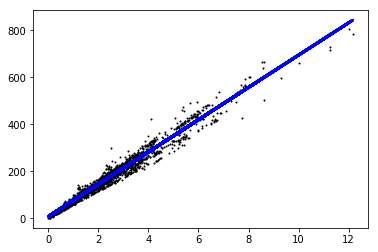

In [103]:
# Plot outputs
plt.scatter(all_gps, all_mile,
            color='black',
            s=1)
plt.plot(X_train,
         regr.predict(X_train),
         color='blue',
         linewidth=3)

plt.show();

### K=26의 K-means clustering 적용

### 새로운 RDC 배정

In [107]:
size = stores_USA[stores_USA['DC'] == 551]["TTL"]
x = stores_USA[stores_USA['DC'] == 551]["X"]
y = stores_USA[stores_USA['DC'] == 551]["Y"]

In [109]:
new_x = (x * size).sum() / size.sum()
new_y = (y * size).sum() / size.sum()
print(new_x, new_y)

-93.9570364503 45.5485022521


In [113]:
rdc_gps_df.ix[551]

X   -93.244236
Y    45.100414
Name: 551, dtype: float64

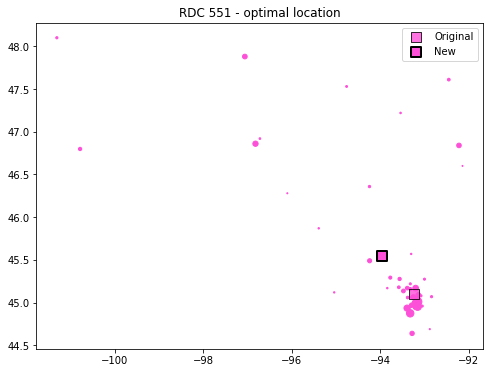

In [120]:
plt.figure(figsize=(8,6))
store = stores_USA[stores_USA['DC'] == 551]

plt.scatter(store.X, store.Y,
            s=(size / size.min())**2.25,
            c=color_map[551],
            label=None)

ax = plt.scatter(rdc_gps_df.ix[551].X, rdc_gps_df.ix[551].Y,
                 c=color_map[551],
                 linewidth='1',
                 edgecolor='black',
                 marker='s',
                 s=100,
                 alpha=0.8)
ax.set_label('Original')

ax = plt.scatter(new_x, new_y,
                 c=color_map[551],
                 linewidth='2',
                 edgecolor='black',
                 marker='s',
                 s=100)
ax.set_label('New')

plt.title('RDC 551 - optimal location')
plt.legend()
plt.show();

#### 자동화

In [ ]:
def draw_arrow(old, new):
    ax = plt.axes()
    for i in old.keys():
        old_x = old[i][0]
        old_y = old[i][1]
        new_x = new[i][0]
        new_y = new[i][1]
        dx = (new_x - old_x) * 0.8
        dy = (new_y - old_y) * 0.8

        ax.arrow(old_x, old_y, dx, dy, head_width=1, head_length=2, fc=color_map[i], ec=color_map[i])

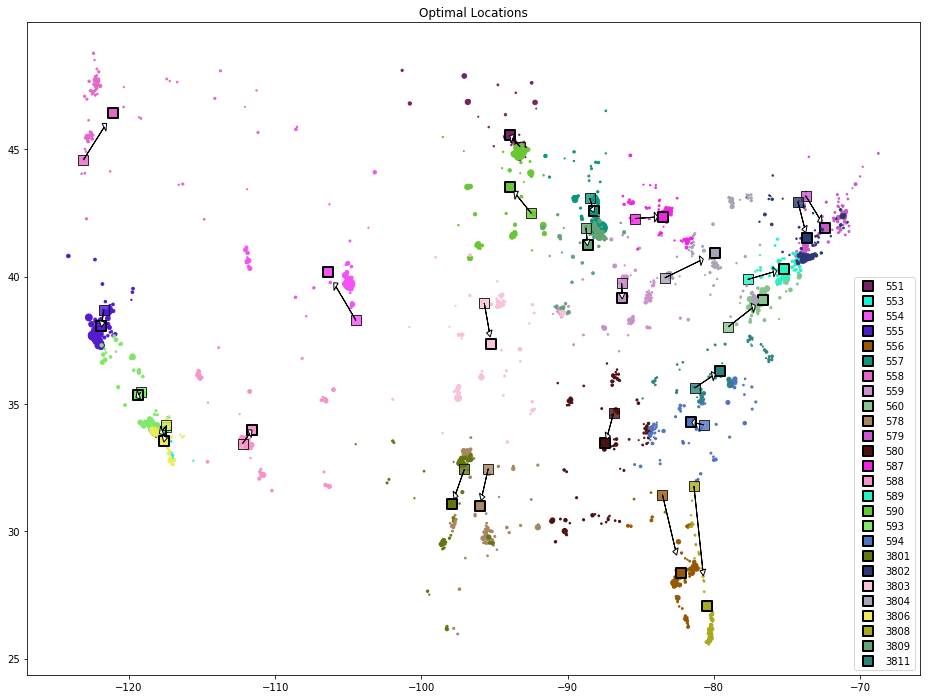

In [64]:
rdc_gps_new = {}
plt.figure(figsize=(16,12))

for i in rdc_store.keys():
    store = stores_USA[stores_USA['DC'] == i]
    size = store["TTL"]
    x = store["X"]
    y = store["Y"]
    old_x = rdc_gps_df.ix[i].X
    old_y = rdc_gps_df.ix[i].Y
    new_x = (x * size).sum() / size.sum()
    new_y = (y * size).sum() / size.sum()
    rdc_gps_new[i] = [new_x, new_y]
    plt.scatter(store.X, store.Y, s=(size / size.min())**2.25, c=color_map[i], label=None)
    # original
    plt.scatter(old_x, old_y,
                c=color_map[i], linewidth='1', edgecolor='black', marker='s', s=100, alpha=0.8, label=None)
    # new
    ax = plt.scatter(new_x, new_y, c=color_map[i], linewidth='2', edgecolor='black', marker='s', s=100)
    ax.set_label(i)
    
    # arrow
    dx = (new_x - old_x) * 0.7
    dy = (new_y - old_y) * 0.7
    plt.arrow(old_x, old_y, dx, dy, head_width=0.4, head_length=0.23, fc='white', ec='black')
    
    
plt.title('Optimal Locations')
plt.legend()
plt.show();

#### original cost

In [104]:
rdc_cost = {}
for i in rdc_store.keys():
    store = stores_USA[stores_USA['DC'] == i]
    rdc_cost[i] = int((store['MILES'] * store['TTL'] * 0.378).sum())
rdc_cost

{551: 749153502,
 553: 681536029,
 554: 2305674242,
 555: 1386812391,
 556: 2892387101,
 557: 1338942925,
 558: 2488648839,
 559: 1608507291,
 560: 2633606753,
 578: 2749953026,
 579: 2669301142,
 580: 2596130867,
 587: 1573361238,
 588: 2061553772,
 589: 1943725663,
 590: 2318312772,
 593: 1489626904,
 594: 1895056318,
 3801: 1693203652,
 3802: 2190995790,
 3803: 2161649739,
 3804: 2437463036,
 3806: 847766539,
 3808: 3230638095,
 3809: 981113279,
 3811: 1599040078}

#### optimal cost

In [105]:
rdc_cost_new = {}

for i in rdc_store.keys():
    store = stores_USA[stores_USA['DC'] == i]

    store_x = store.X
    store_y = store.Y

    rdc_x = rdc_gps_new[i][0]
    rdc_y = rdc_gps_new[i][1]

    gps_diff = (abs(store_x - rdc_x)**2 + abs(store_y - rdc_y)** 2)**0.5

    new_MILES = regr.predict(gps_diff.values.reshape(-1, 1))

    rdc_cost_new[i] = int((new_MILES.flatten() * store['TTL'] * 0.378).sum())

In [106]:
rdc_cost_new

{551: 1029919695,
 553: 550738399,
 554: 1794167751,
 555: 981778485,
 556: 969786553,
 557: 1056849665,
 558: 1982605923,
 559: 1702088483,
 560: 1013739526,
 578: 2105456855,
 579: 1653551742,
 580: 2401392519,
 587: 825932277,
 588: 2045348529,
 589: 728749746,
 590: 1785812557,
 593: 1389753168,
 594: 1907328238,
 3801: 1604561757,
 3802: 1352920815,
 3803: 1906130553,
 3804: 1509301490,
 3806: 684680964,
 3808: 906336092,
 3809: 998914270,
 3811: 1461631685}

#### 비교

In [107]:
rdc_cost = Series(rdc_cost)
rdc_cost_new = Series(rdc_cost_new)

In [208]:
rdc_cost.sum()
rdc_cost_new.sum()

50524160983

34080226440

In [109]:
rdc_cost_new.sum()

36349477737

In [110]:
(rdc_cost.sum() - rdc_cost_new.sum())/rdc_cost.sum()

0.28055257069522427